# Name : UTHSAVI KP

# Task-1 : Prediction using Supervised ML

In [4]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Reading the data from the url
df_data = pd.read_csv("http://bit.ly/w-data")

In [7]:
df_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
df_data.shape

(25, 2)

In [10]:
df_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
df_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

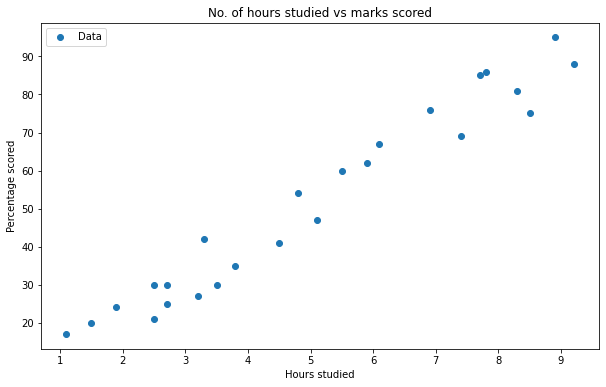

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df_data['Hours'],df_data['Scores'],label='Data')
plt.title('No. of hours studied vs marks scored')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.legend()
plt.show()

#### By looking at the above graph, we can obsorve that there is a positive linear relationship between the number of hours 
#### a student studied and marks scored by the student.
 

# Heatmap for correlation check

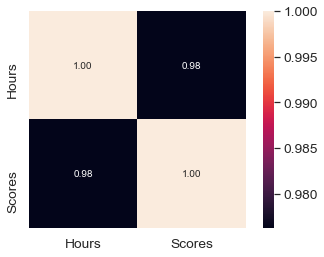

In [14]:
import seaborn as sns
k = 2
corrmat = df_data.corr()
columns = corrmat.nlargest(k,'Hours')['Hours'].index
cm = np.corrcoef(df_data[columns].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values,
xticklabels=columns.values)
plt.show()

#### From the above heatmap,we can see that there is a positive correlation between Hours and Score
#### i.e as the number of hours studied increases marks scored by the student also increases

## Data Preparation

In [15]:
# Divide the data into features(X) and labels(y)
X = df_data.drop(['Scores'],axis=1)
y = df_data['Scores'] 

In [16]:
# From sklearn model selection importing the function train_test_split for diving the data into training and testing dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [20]:
y_train.shape

(18,)

In [21]:
y_test.shape

(7,)

# Training with Linear Regression Algorithm

In [22]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)
#lr_predict = lr.predict(X_test)

LinearRegression()

### To retrive the intercept

In [23]:
print(regression.intercept_)

1.932204253151646


### For retriving the slope (coefficient of X)

In [24]:
print(regression.coef_)

[9.94167834]


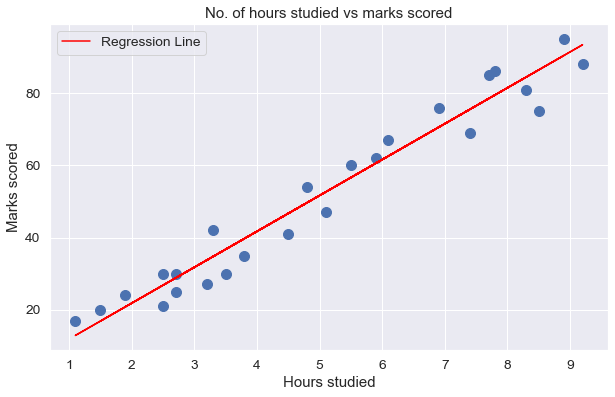

In [25]:
#Plotting the regression line on full dataset
line = regression.coef_*X + regression.intercept_

plt.figure(figsize=(10,6))
plt.scatter(X, y,s=100)
plt.title('No. of hours studied vs marks scored')
plt.xlabel('Hours studied')
plt.ylabel('Marks scored')
plt.plot(X, line,color='red', label='Regression Line')
plt.legend()
plt.show()

# Making the Prediction

In [19]:
# Making prediction using the test dataset
y_pred = regression.predict(X_test)

In [20]:
#To compare the actual output of X_test with the predicted X_test

In [21]:
df_data = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_data

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


## Plotting the Regression line on Test data

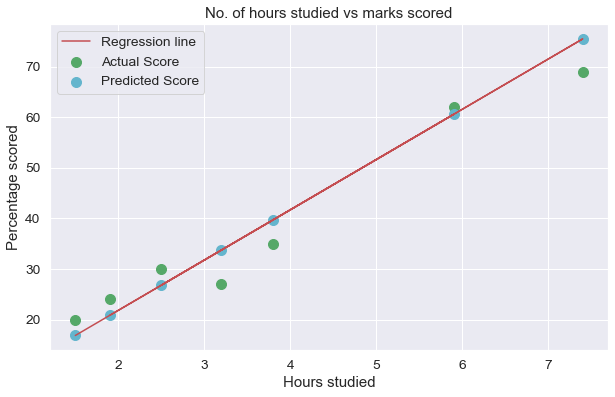

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(X_test,y_test,s=100,color='g',label='Actual Score')
plt.scatter(X_test,y_pred,s=100,color='c',label='Predicted Score')
plt.plot(X_test,y_pred,color='r',label='Regression line')
plt.title('No. of hours studied vs marks scored')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.legend()
plt.show()

# Evaluating the Model Performance

In [23]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055
R2 score: 0.9367661043365055


#### R-squared represents the proportion of the variance for a dependent variable that is explained by an independent variable.
#### Here the R-squared is 0.9367,it means that a full 93.67% of the variation of one variable is completely explained by the other. 


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [24]:
hours = 9.25
test = np.array([hours]).reshape(-1, 1)
score_pred = regression.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(np.round(score_pred[0],2)))

No of Hours = 9.25
Predicted Score = 93.89
